<a href="https://colab.research.google.com/github/Azad-Me/Netflix-Movie-Recommendation-System/blob/main/Netflix_Movies_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Netflix Movies Recommendation System**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

**When we open platforms like YouTube, Amazon Prime, or Netflix, we often find ourselves easily discovering interesting movies and TV shows without much effort. For example, after finishing Stranger Things, we might shift to Dark or Moon Water without even searching for them. Similarly, if we watch some Yoga videos on YouTube, our homepage will be flooded with related Yoga videos, which we might start watching without any second thoughts. This magic is made possible by the mathematical algorithms used in Recommender Engines.**

**In this project, we aim to leverage this technology to build a Movies Recommendation System for Netflix. This system will help content-based companies and service providers to cluster customers and provide user-specific recommendations. By doing so, companies can increase the coverage of their businesses and ultimately lead to more profits.**

# **GitHub Link -**

https://github.com/Azad-Me/Netflix-Movie-Recommendation-System

# **Problem Statement**


**Our project aims to address the challenge faced by content-based companies in providing personalized recommendations that align with their users' interests. With the increasing amount of content available, it is becoming more challenging to filter through and provide relevant recommendations. However, with the wealth of data available, generated by users' viewing histories and feedback, we believe that we can build a better recommendation system.**

**Our project, therefore, focuses on reshaping the existing recommendation system to incorporate machine learning algorithms and generate content-based recommendations. Specifically, we plan to analyze the data generated by users to cluster movies and TV shows based on similarities in genre, plot, and other factors. We will then use this data to generate daily recommendations for users based on their viewing history and preferences.**

**By building a better recommendation system, we aim to improve user engagement, drive customer satisfaction, and ultimately increase revenue by providing a better user experience. We will measure the success of our project by tracking the engagement and satisfaction levels of our users, as well as analyzing the revenue generated from increased user engagement.**

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import missingno as miss

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# library used for textual data prerocessing
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.5 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
first_df = pd.read_csv('/content/drive/MyDrive/dat/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
first_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('There are',len(first_df['show_id']),'rows in the Dataset.')
print('There are',len(first_df.columns),'columns in the Dataset.')

There are 7787 rows in the Dataset.
There are 12 columns in the Dataset.


### Dataset Information

In [ ]:
# Dataset Info
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'In the Dataset, there are {first_df.duplicated().sum()} duplicate values.')

In the Dataset, there are 0 duplicate values.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
(first_df.isnull().sum()/len(first_df['show_id'])*100).round(2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

**We can see there are 30 % null values present in the director column, 9 % in the cast column and 6.5 % in the country column.**

<Axes: >

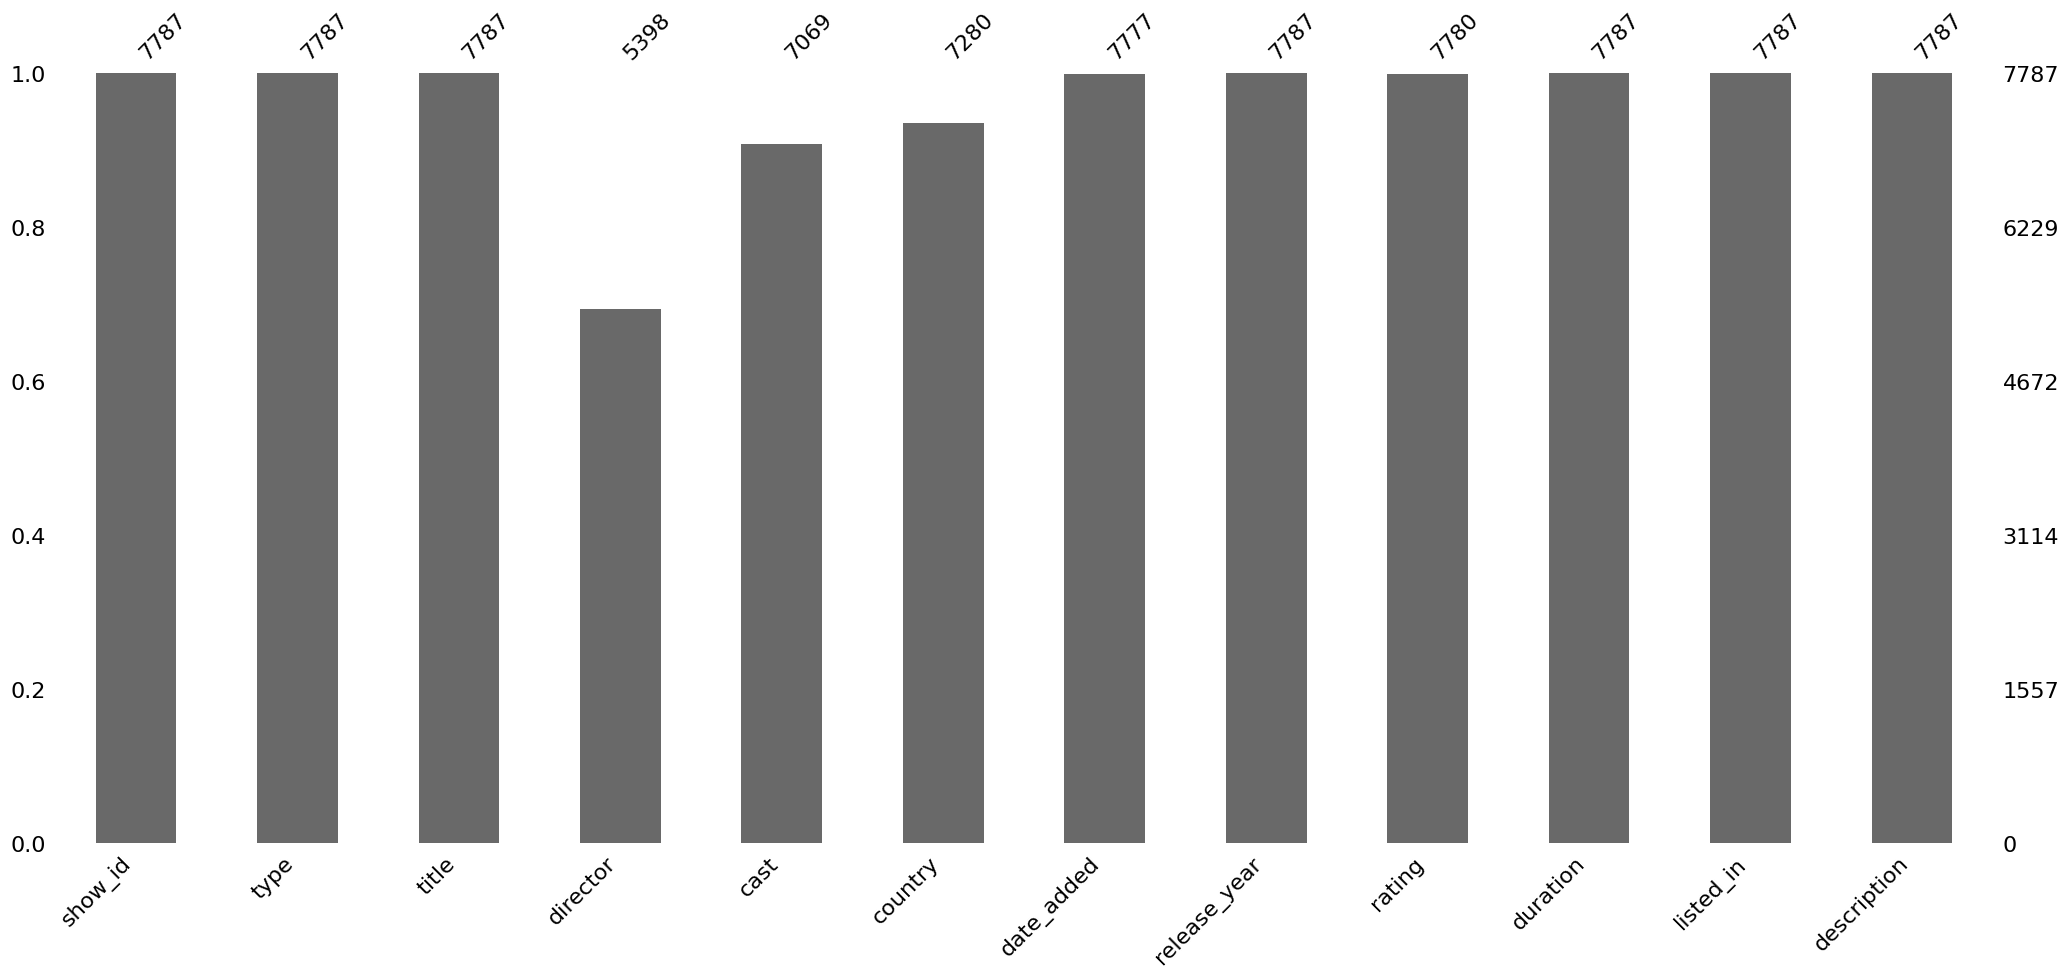

In [ ]:
# Visualizing the missing values
miss.bar(first_df)

**The bar related to the director , cast and country feature is not fullfilled and showing the null values.**

### What did you know about your dataset?

**The Dataste consist zero duplicated columns but consist the null values in 3 features significantly. From the Datset we can see the infomation about the content title , director , cast , genre and description is given in the dataset which will be the primary features for the content based recommendation system.There are 7787 datapoints on which the system will provide recommendations.**

## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
first_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
first_df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description 

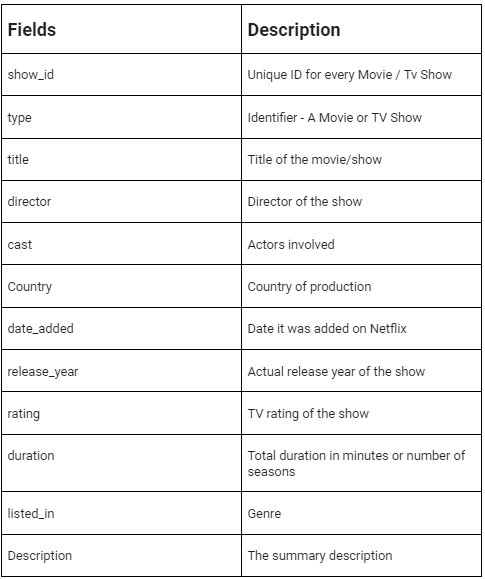

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in first_df:
  print(f'There are {first_df[i].nunique()} unique values in column {i}')

There are 7787 unique values in column show_id
There are 2 unique values in column type
There are 7787 unique values in column title
There are 4049 unique values in column director
There are 6831 unique values in column cast
There are 681 unique values in column country
There are 1565 unique values in column date_added
There are 73 unique values in column release_year
There are 14 unique values in column rating
There are 216 unique values in column duration
There are 492 unique values in column listed_in
There are 7769 unique values in column description


## 3. **Data Wrangling**

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
first_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# The dataset will be trimmed on the basis of following features , and then the new df will be considered for the further analysis.
movies_df= first_df[['show_id','title','director','cast','rating','listed_in','description']]

In [ ]:
# The function for expanding the contractions.
def expand_contraction(text):
  return contractions.fix(text)

In [ ]:
# Define a function to perform rephrasing using NLTK
def rephrase_sentence(sentence):    
    words = word_tokenize(sentence) # Tokenize the sentence into words
    # Create a list to store the rephrased sentence
    rephrased_sentence = []
    # Iterate over each word in the sentence
    for word in words:
        # Get the synonyms for the word
        synonyms = wordnet.synsets(word)
        if len(synonyms) > 0:
            # Choose a random synonym from the list
            new_word = synonyms[0].lemmas()[0].name()
        else:
            # If no synonyms are found, keep the original word
            new_word = word
        # Append the new word to the rephrased sentence
        rephrased_sentence.append(new_word)
    # Join the words in the rephrased sentence back into a string
    return ' '.join(rephrased_sentence)
     

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1 **The Year-wise count of released movies.**

Text(0.5, 1.0, 'Year-wise distribution of released items')

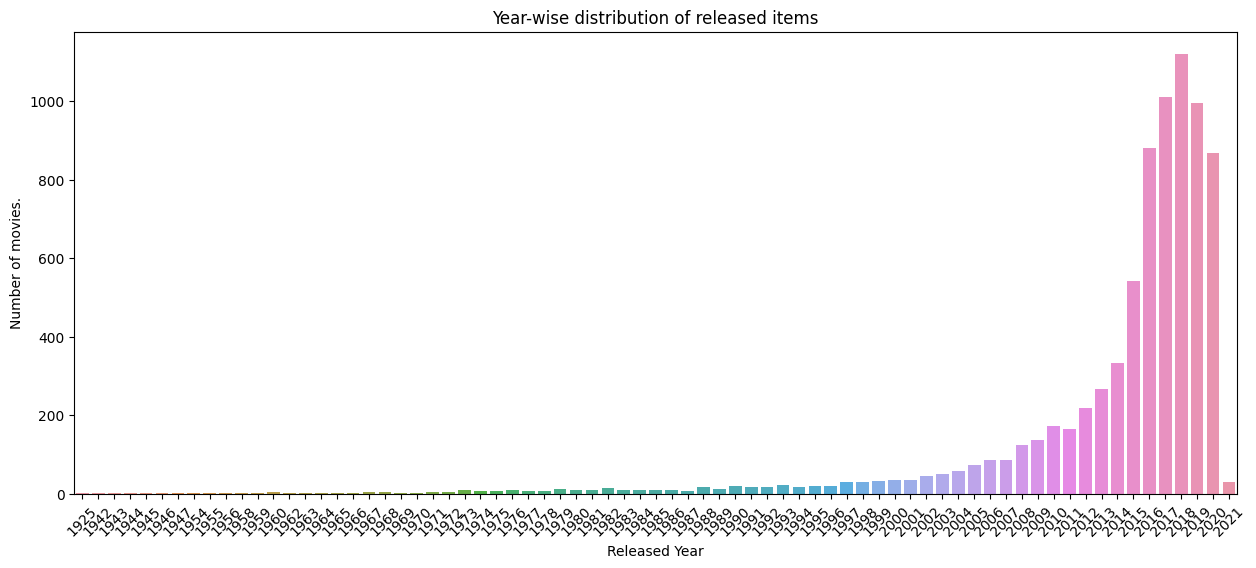

In [ ]:
# Chart - 1 visualization code
year = first_df['release_year'].value_counts()
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.barplot( x =year.index, y = year)
plt.xlabel('Released Year')
plt.ylabel('Number of movies.')
plt.title('Year-wise distribution of released items')

**The seaborn graph shows the trend anlysis for all the released item by the netflix. It shows the maximum number of releases in the year 2018.**

#### Chart - 2 Movies and TV Counts

In [ ]:
# Chart - 2 visualization code
number= first_df['type'].value_counts()

Text(0, 0.5, 'Number of release.')

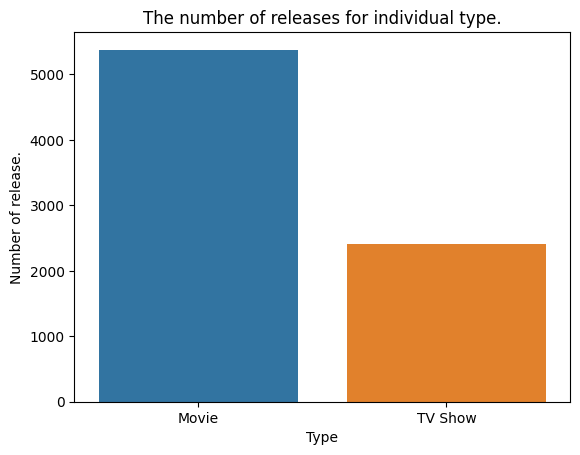

In [ ]:
sns.barplot(x=number.index , y=number)
plt.title('The number of releases for individual type.')
plt.xlabel('Type')
plt.ylabel('Number of release.')

**With the help of graph it is easy to understand the distribution of netflix released items in Movies and Tv shows. So the movies have dominated the market standing  at 300 % of TV shows releases.**

#### Chart - 3 Director

In [ ]:
# Chart - 3 visualization code
direc_df=first_df['director'].value_counts()

<Axes: xlabel='director'>

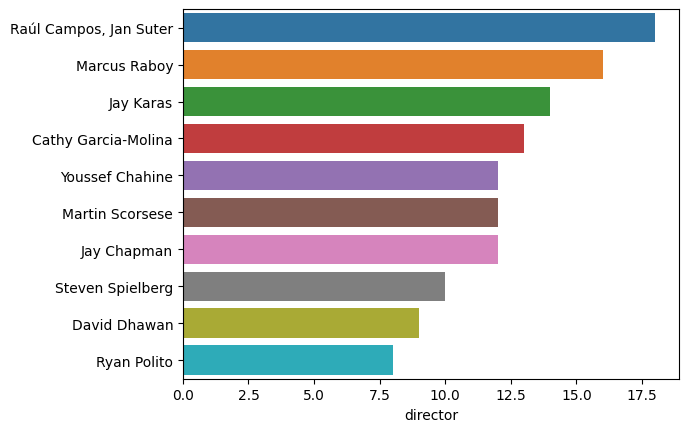

In [ ]:
sns.barplot(x=direc_df[:10] , y=direc_df.index[:10] )

**This graph shows the name of director with most frequent movies. So Raul Campos and  Jan Suter  are the most frequent directors ,probably involved in maximum nuber of movies and tvshows.**

#### Chart - 4 Country

In [ ]:
first_df['country'].value_counts()[:15].index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Egypt', 'Turkey', 'Mexico', 'Australia',
       'Taiwan', 'Brazil', 'Philippines'],
      dtype='object')

In [ ]:
# Chart - 4 visualization code
first_df['country'].value_counts()[:15]

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Mexico             100
Australia           83
Taiwan              78
Brazil              72
Philippines         71
Name: country, dtype: int64

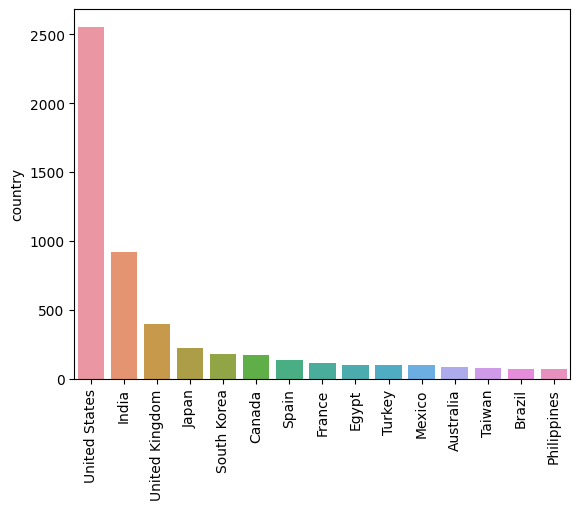

In [ ]:


ax=sns.barplot(x=first_df['country'].value_counts()[:15].index,y=first_df['country'].value_counts()[:15])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**The astonishing fact is, India stands at second position for Netflix movies and Tv shows.The grpah reveal important information about the countries which releases the maximum nuber of Netflix Movies. United States shows maximum frequency from all the countries.**

#### Chart - 5 The Count of Rating

In [ ]:
# Chart - 5 visualization code
first_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

<Axes: xlabel='rating'>

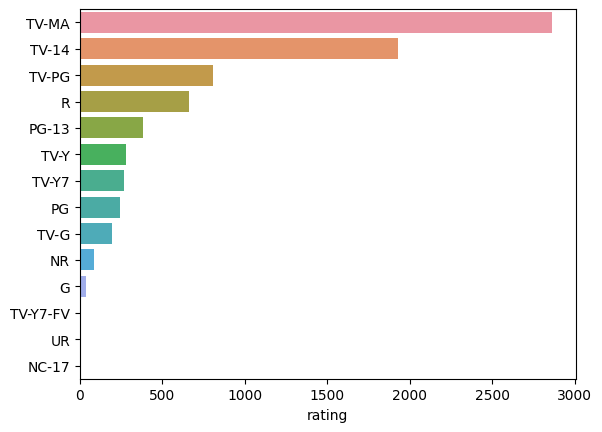

In [ ]:
sns.barplot(x= first_df['rating'].value_counts() , y= first_df['rating'].value_counts().index)

**TV-MA is a content rating used in the United States by the TV Parental Guidelines to indicate that a television program is intended for mature audiences and is not suitable for children under the age of 17. The "MA" stands for "Mature Audience" and is intended to indicate that the program contains content that may be inappropriate for younger viewers, such as graphic violence, strong language, nudity, sexual content, or substance abuse.**

**TV-MA is one of the highest content ratings used by the TV Parental Guidelines, with the others being TV-Y (intended for all children), TV-Y7 (intended for children ages 7 and up), TV-PG (parental guidance suggested), TV-14 (intended for viewers 14 and up), and TV-G (general audience). The TV-MA rating is typically applied to programs that air during primetime or late-night hours and is intended to alert parents and other viewers to the potentially mature content of the program.**

#### Chart - 6 Growth of TV shows over the period of time

In [ ]:
# Chart - 6 visualization code
country_df=first_df.groupby(['release_year','type'])['show_id'].count().reset_index()
country_df

release_year     type  show_id
0            1925  TV Show        1
1            1942    Movie        2
2            1943    Movie        3
3            1944    Movie        3
4            1945    Movie        3
..            ...      ...      ...
113          2019  TV Show      414
114          2020    Movie      411
115          2020  TV Show      457
116          2021    Movie       12
117          2021  TV Show       19

[118 rows x 3 columns]

<Axes: xlabel='release_year', ylabel='show_id'>

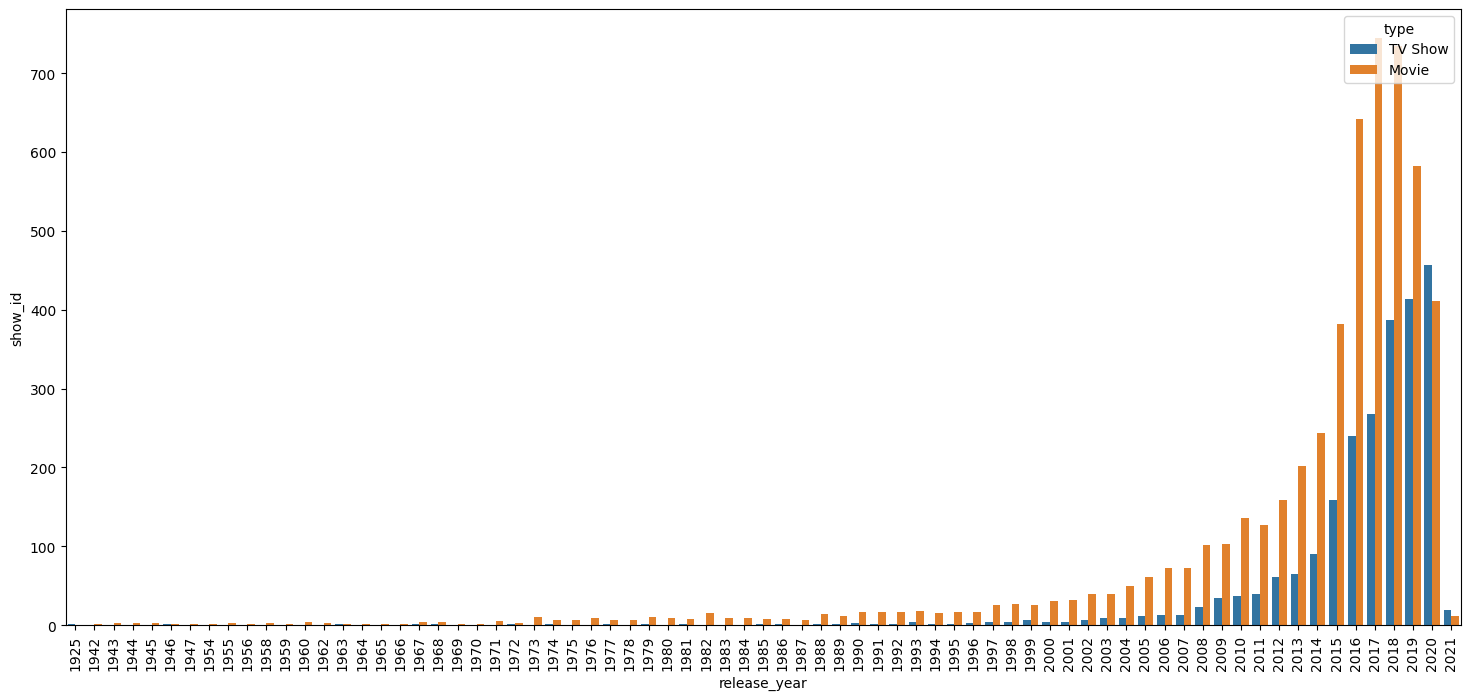

In [ ]:
fig,ax = plt.subplots(figsize = [18,8])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(x=country_df['release_year'], y= country_df['show_id'],hue = country_df['type'])


**All the years since 1925 , it is the movies which is dominating the netlix page. In every year the number of movies released is more htan the number of released TV shows. The Peak for the highest number of releases achieved in the year 2017.**

## ***Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
movies_df.isnull().sum()

show_id           0
title             0
director       2389
cast            718
rating            7
listed_in         0
description       0
dtype: int64

In [ ]:
movies_df.fillna(' ',inplace = True)

**There are three columns in the dataset which shows the null values. Their are 2389 instances where the name of directors is missing. Certainly these missing values do not impact the other information related with the title. For . eg If a movie missed the name of its director, still it could be fillterdout on the basis of remaining relevant information. So I replaced all the null values with blank string, so that we could use the remaining information of the movies.**

###  Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
movies_df.head()

show_id  title           director  \
0      s1     3%                      
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast rating  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  TV-MA   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  TV-MA   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      R   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  PG-13   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  PG-13   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
movies_df['director']=movies_df['director'].apply(lambda x : x.replace(' ',''))
movies_df['cast']=movies_df['cast'].apply(lambda x : x.replace(' ',''))
movies_df['rating']=movies_df['rating'].apply(lambda x : x.replace('-',''))
movies_df['listed_in']=movies_df['listed_in'].apply(lambda x : x.replace(' ',''))

In [ ]:
movies_df['cast']=movies_df['cast'].apply(lambda x : x.replace(',' ,' '))

In [ ]:
movies_df['cast'][0]

'JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira RafaelLozano VivianePorto MelFronckowiak SergioMamberti ZezéMotta CelsoFrateschi'

**In order to get clear and confusion free recommendations we need to remove spaces between two related words. It created more preciseness while searching the content. for e.g Karan Johar and Karan jit singh Vohara, while searching fro Karan the system will show both the results.**

In [ ]:
movies_df['tags']= movies_df['director']+' ' +movies_df['cast']+' ' +movies_df['rating']+ ' ' +movies_df['listed_in']+ ' ' +movies_df['description']

In [ ]:
movies_df['tags'][1]

'JorgeMichelGrau DemiánBichir HéctorBonilla OscarSerrano AzaliaOrtiz OctavioMichel CarmenBeato TVMA Dramas,InternationalMovies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

**Adding all the necessary columns for creating the tags.**

In [ ]:
movies_df['new_tags']= movies_df['tags']
try:
  
  for j,i in enumerate(movies_df['tags']):
    movies_df['new_tags'][j] =contractions.fix(movies_df['tags'][j])
except:
  pass
finally:
    for i in (movies_df['tags'][2323:].index):
      movies_df['new_tags'][i] = contractions.fix(movies_df['tags'][i])
      

**In the movies dataframe , the tag no.2322 is somehow poping up the error. It shows the document `String Index Out of Range`. Hence I skipped the document and again started expanding contractions from 2323. I use Error Handling technique to deal with the problem.**

In [ ]:
movies_df['tags'][2322]

'FerzanÖzpetek HalitErgenç Nejatİşler MehmetGünsür ÇiğdemSelışıkOnat TubaBüyüküstün SerraYılmaz ZerrinTekindor AytenGökçer İpekBilgin ErginBal TVMA Dramas,IndependentMovies,InternationalMovies Upon his return to Istanbul, an expat writer-editor finds himself stranded inside a web of tangled relationships after his filmmaker friend vanishes.'

#### 2. Lower Casing
**For lowering the letters of documents.**

In [ ]:
# Lower Casing
def lower_casing(text):
  return text.lower()

In [ ]:
movies_df['new_tags']= movies_df['new_tags'].apply(lower_casing)

In [ ]:
movies_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramas,independentmovies,internationalmovies upon his return to istanbul, an expat writer-editor finds himself stranded inside a web of tangled relationships after his filmmaker friend vanishes.'

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
punctuation = [ i for i in string.punctuation]

In [ ]:
def punct_text(text):
  return ''.join([ i for i in text if i not in punctuation])

In [ ]:
movies_df['new_tags'] =movies_df['new_tags'].apply(punct_text)

In [ ]:
movies_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramasindependentmoviesinternationalmovies upon his return to istanbul an expat writereditor finds himself stranded inside a web of tangled relationships after his filmmaker friend vanishes'

**Here we remove all the punctuations marks from all the document.**

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

LK = len(movies_df['new_tags'])
new_tag_df = movies_df.copy()  # create a copy of the original dataframe

for i in range(LK):
    new_com = ''
    for j in movies_df['new_tags'][i].split():
        # remove URLs
        if not j.startswith("http"):
            # remove words and digits containing digits
            if not bool(re.search(r'\d', j)):
                new_com += ' ' + j
    new_tag_df.at[i, 'new_tags'] = new_com.strip()

**The code is cleaning up the 'new_tags' column of a DataFrame by removing any URLs and words/digits containing digits.The code creates a copy of the original DataFrame to avoid modifying the original data. It then iterates over each row in the 'new_tags' column and creates a new string variable 'new_com' initialized to an empty string.**
**For each word in the current tweet, the code checks whether it starts with "http" using the startswith() method. If it does not start with "http", the code then checks whether the word contains any digits using a regular expression. If it does not contain any digits, then the word is appended to the 'new_com' variable with a space character.**
**Finally, the updated tweet is stored back into the 'new_tag' column of the copied DataFrame using the at() method.**
**Overall, this code is performing text cleaning by removing URLs and words containing digits from the 'new_tag' column of a DataFrame.**

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
stop_list=stopwords.words('english')
def stopword_remove(text):
  return ' '.join([i for i in text.split() if i not in stop_list])

In [ ]:
new_tag_df['new_tags'] =new_tag_df['new_tags'].apply(stopword_remove)

In [ ]:
new_tag_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramasindependentmoviesinternationalmovies upon return istanbul expat writereditor finds stranded inside web tangled relationships filmmaker friend vanishes'

In [ ]:
# Remove White spaces
def remove_white(text):

  return ' '.join([i.replace(' ','') for i in text.split()])

In [ ]:
new_tag_df['new_tags'] = new_tag_df['new_tags'].apply(remove_white)

In [ ]:
new_tag_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramasindependentmoviesinternationalmovies upon return istanbul expat writereditor finds stranded inside web tangled relationships filmmaker friend vanishes'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Functions for `Rephrasing` is already defined in the earlier tabs.

new_tag_df['new_tags'] = new_tag_df['new_tags'].apply(rephrase_sentence)

**Rephrasing involves finding the better words and synonymms for the existing words in the documents.In the function the document is getting tokenized first and then it gets implemented over `synset` method of `wordnet` library which finds all the synonymms for the word.Then it find alternate word for the first synonymm and choose the first name as the alternate word.**

#### 7. Tokenization

In [ ]:
# Tokenization
new_tag_df['new_tags']=new_tag_df['new_tags'].apply(word_tokenize)

In [ ]:
print(new_tag_df['new_tags'][2322])

['ferzanözpetek', 'halitergenç', 'nejati̇şler', 'mehmetgünsür', 'çiğdemselışıkonat', 'tubabüyüküstün', 'serrayılmaz', 'zerrintekindor', 'aytengökçer', 'i̇pekbilgin', 'erginbal', 'tvma', 'dramasindependentmoviesinternationalmovies', 'upon', 'tax_return', 'Istanbul', 'exile', 'writereditor', 'discovery', 'maroon', 'inside', 'web', 'embroil', 'relationship', 'film_maker', 'friend', 'disappear']


#### 8. Text Normalization

In [ ]:
norm_df = new_tag_df.copy()

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# The functions is used for Lemmatizing the tweets
def Lemmatizer(doc):
  lemmatizer= WordNetLemmatizer() # Instantiation of lemmatizer
  result = [lemmatizer.lemmatize(i) for i in doc]
  return ' '.join(result)
     

**The given code defines a function called `Lemmatizer` that takes in a document as an argument and uses the WordNetLemmatizer method from the NLTK library to lemmatize each word in the document. It then returns a string of the lemmatized words joined together with spaces. The probable output of running this function would be a string of the lemmatized version of the input document.**

In [ ]:
norm_df['new_tags']=norm_df['new_tags'].apply(Lemmatizer)

In [ ]:
norm_df['new_tags'][2322]

'ferzanözpetek halitergenç nejati̇şler mehmetgünsür çiğdemselışıkonat tubabüyüküstün serrayılmaz zerrintekindor aytengökçer i̇pekbilgin erginbal tvma dramasindependentmoviesinternationalmovies upon tax_return Istanbul exile writereditor discovery maroon inside web embroil relationship film_maker friend disappear'

#### 9. Text Vectorization

In [ ]:
# Vectorizing Text
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 10000)
tfidf_bag1=tfidf.fit_transform(norm_df['new_tags'].values).toarray()

#### 10. Finding the 10 most important words.

In [ ]:
sum_frequency= np.sum(tfidf_bag1,axis = 0) # finding the sum of all the frequency for all the vectors.

index_freq = np.argsort(sum_frequency)[:20] # Finding the arguments for all the sum values of frequencies.
highest_fre=np.flip(np.sort(sum_frequency))[:20] # Sorting the indexes and flipping according to the descending order.
print(f' The sum of frequencies for all the vectors {highest_fre}.')
print(' ')
print(f'The indexes of the top 20 highest frequencies {index_freq}')
freq_location=np.zeros([index_freq.shape[0],sum_frequency.shape[0]])


 The sum of frequencies for all the vectors [224.90061938 126.71158808 104.80160024 104.56279397  88.33663486
  87.16747328  83.9404672   82.60385902  81.41789071  79.49677946
  77.24555563  76.06271192  75.69431261  69.75063294  68.27398157
  67.58998625  61.05319497  58.54959954  58.23632128  55.60369667].
 
The indexes of the top 20 highest frequencies [9960 2237  169 6557 5268 9928 6462 6157 9994 8914 9900 9217 5110 2247
 2955 8967  902 4586 6566 4935]


In [ ]:
# Assigning the singular value to the desired location for reverse transform.
for column, row in zip(index_freq,range(20)):
  freq_location[row,column] =1

In [ ]:
# List of words
most_freq_words=tfidf.inverse_transform(freq_location)
most_freq_words

[array(['zakorth'], dtype='<U59'),
 array(['danielkaluuya'], dtype='<U59'),
 array(['admiles'], dtype='<U59'),
 array(['noahschnapp'], dtype='<U59'),
 array(['kotonomitsuishi'], dtype='<U59'),
 array(['yukomiyamura'], dtype='<U59'),
 array(['nerv'], dtype='<U59'),
 array(['mikinagasawa'], dtype='<U59'),
 array(['ólafurdarriólafsson'], dtype='<U59'),
 array(['takahirofujiwara'], dtype='<U59'),
 array(['yoshiromatsumoto'], dtype='<U59'),
 array(['toshiyukikubooka'], dtype='<U59'),
 array(['kenjinojima'], dtype='<U59'),
 array(['danielrigby'], dtype='<U59'),
 array(['elly'], dtype='<U59'),
 array(['tatsuyanakamura'], dtype='<U59'),
 array(['ayumumurase'], dtype='<U59'),
 array(['jeannaharrison'], dtype='<U59'),
 array(['nobuyukisuzuki'], dtype='<U59'),
 array(['junedianeraphael'], dtype='<U59')]

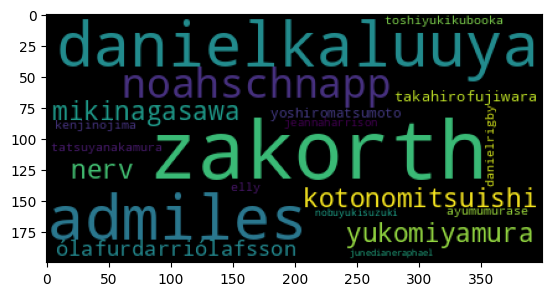

In [ ]:
wordcloud=WordCloud().generate(' '.join([i[0] for i in most_freq_words]))
plt.imshow(wordcloud)

**WordCLoud is providing a brief idea about the most frequent word. In vectorization I have implemented  term frequency and inverse document frequency. So the word `ZAKORTH` has maximum frequency, followed by `danielkaluuya`.**

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**When the vectorization have been implemented, we saw a leap jump in number of features. It gave more than 50,000 features. Hence I required to cap the number of features to the  10000 most important features. But 10000 is also a big number and would require huge computational cost and storage, to process. Hence it becomes very important to cross check the amount of information it stores. Hence by reducing the dimenssions using Principle Component Analysis, we can analyse the amount of variance and its respective number of features.**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# DImensionality Reduction (If needed)


pca = PCA()
pca.fit(tfidf_bag1)

PCA()

In [ ]:
# By transforming we are storing the principal components in the variable features.
features = pca.transform(tfidf_bag1)
features.shape

(7787, 7787)

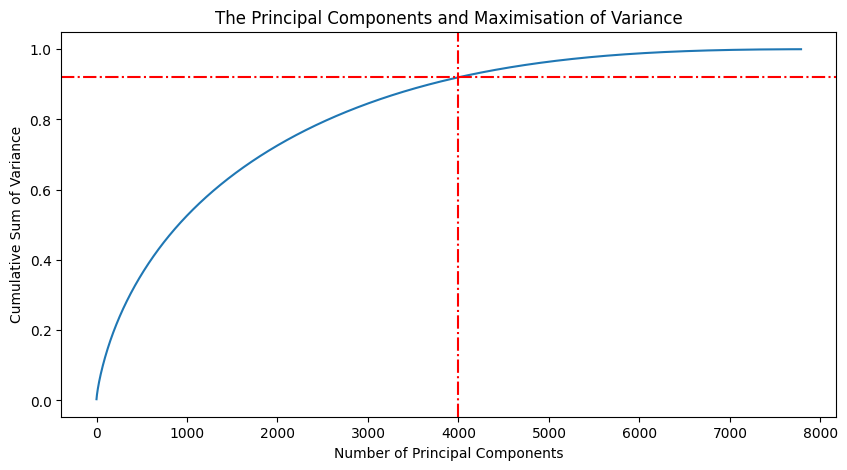

In [ ]:
#Analysing the variance for different number of features and plotting the graph

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('The Principal Components and Maximisation of Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Sum of Variance')
plt.axhline(0.92,color='r',linestyle= '-.')
plt.axvline(4000,color='r',linestyle= '-.')

**After Implementing the Principle Component Analysis, we can see the amount of variance shown by 4000 features is nearly 92%. So, when we had implemented the term frequency algorithm, we had seen near about 50K features. Then using the `max features` we reduced them to 10000. Even after then, we can see the 90% variance is restricting to near about 4000 features. Hence we can easily use these features for our recommendation engine, with the add on benefits of efficient memory usage and subsequent reduction in computational cost.**

In [ ]:
# Reducing the number of principle components
pca = PCA(n_components = 4000)
ext_features= pca.fit_transform(tfidf_bag1)

In [ ]:
ext_features.shape

(7787, 4000)

**Now onwards I will be using this new `ext_feature` principle components for clustering and content based fltering.**

## ***7. ML Model Implementation***

### ML Model-1 

**K-Means CLustering Analysis of Netflix movies .**\
**Finding the optimum number of Clusters using the Elbow Method and Silhouette score on 4500 most important principal components.**

In [ ]:
def optimum_clusters(method_name, features_matrix):

  '''optimum clusters is finding the right number of clusters depending on the method specified.
    features_matrix is the matrix of all the principal components.'''

  clusters = range(2,20) # The number of CLusters
  Y_axis=[]
  for i in clusters:
    kmean = KMeans( n_clusters = i , random_state = 42) # Implementation of KMeans with the 20 different clusters.
    kmean.fit(features_matrix)

  
    if method_name == 'Elbow_method':
      SSE = kmean.inertia_ #SSE - Sum of Squared Error
      Y_axis.append(SSE)   # adding to the list
      plt.title(f'Analysis of number of clusters according to {method_name}')
      plt.ylabel('Sum of squared Error')

    else:
      labels = kmean.labels_   # for silhouette score we need to use the label related information
      silhoutte_score = silhouette_score( features_matrix, labels) # finding the silhouette score
      Y_axis.append(silhoutte_score)

      plt.title(f'Analysis of number of clusters according to {method_name}')
      plt.ylabel('Silhouette Score')


  plt.plot(clusters , Y_axis , marker = 'o' ) # plotting the cluster and their respective values of either the SSE or Silhouette score

  plt.xlabel('Number of Clusters')
  plt.show()

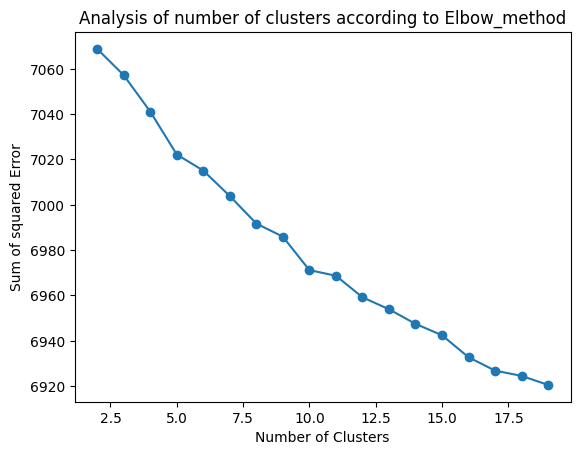

In [ ]:
optimum_clusters('Elbow_method',ext_features)

**If we use elbow method, we can see it is hard to find out the optimum value of cluster.Hence we will move towards silhouette method.**

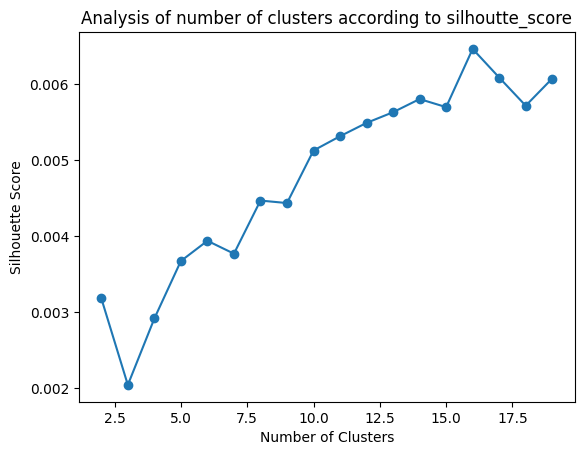

In [ ]:
optimum_clusters('silhoutte_score',ext_features)

**So in silhoutte method , the optimum score had increased once at the level of k =5, then it shows a normal trend and then again syrocketed. SO it became a little problematic to find the value of K. Hence to find the optimum number of clusters, we can study dendrogram.**

In [ ]:
# ML Model - 1 Implementation of KMeans for Elbow Method.

kmean = KMeans(n_clusters = 5, random_state = 42)

# Fit the Algorithm
kmean.fit(features)
# Predict on the model

KMeans(n_clusters=5, random_state=42)

**For a simple results, I have implemented my machine learning model with k= 5.Because the number of clusters have been ambiguous by elbow and silhouette method. So atleast we could understand the nature of clusterisation on the given dataset.Later on in the project we have used `Heirarchial clustering`, which make our work very easy.**

In [ ]:
# Assiginig the label clusters to their individual datapoints.
movies_df['Cluster_label'] = kmean.labels_
movies_df[['show_id','title','new_tags','Cluster_label']].head()

show_id  title                                           new_tags  \
0      s1     3%   joãomiguel biancacomparato michelgomes rodolf...   
1      s2   7:19  jorgemichelgrau demiánbichir héctorbonilla osc...   
2      s3  23:59  gilbertchan teddchan stellachung henleyhii law...   
3      s4      9  shaneacker elijahwood johncreilly jenniferconn...   
4      s5     21  robertluketic jimsturgess kevinspacey katebosw...   

   Cluster_label  
0              2  
1              1  
2              2  
3              2  
4              2

In [ ]:
# For plotting all the features at once in one scatterplot, I have reduced the number of tfidf vectors to only 3. 
# After reducing the components to only 3, the features can be easily plotted with all the clusters.

pca1=PCA(n_components= 3)
dimenssion = pca1.fit_transform(tfidf_bag1)

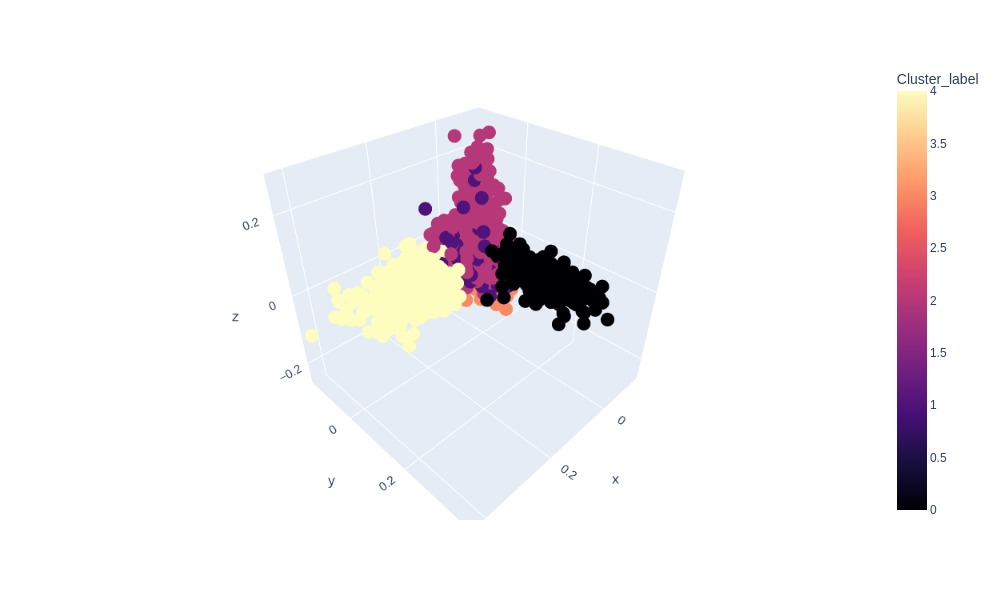

In [84]:
import plotly.express as px

fig = px.scatter_3d(movies_df, x=dimenssion[:,0], y=dimenssion[:,1], z=dimenssion[:,2],color=movies_df['Cluster_label'],
             color_continuous_scale='Magma')
fig.update_layout(width = 1000 ,height=600)
fig.show('jpg')

**We can see the datapoints are getting clustered. PCA have helped us to form the clusters. We know that in the original Datapoints, after vectorization there are 4500 features, which are immpossible to plot on the graph. So I reduced those vectors to only 3 components and then assigned the same old clusters to new data points. For e.g I have implemented the clustering on the dataset which consist 4500 features and then assign their labels to their respective datapoints. But then I again done the feature extraction, reduced the features to only three components. But used the same old clusters which I got in former model implementation. In such way I have plotted the plotly graph with their clusters.**

<Axes: ylabel='Cluster_label'>

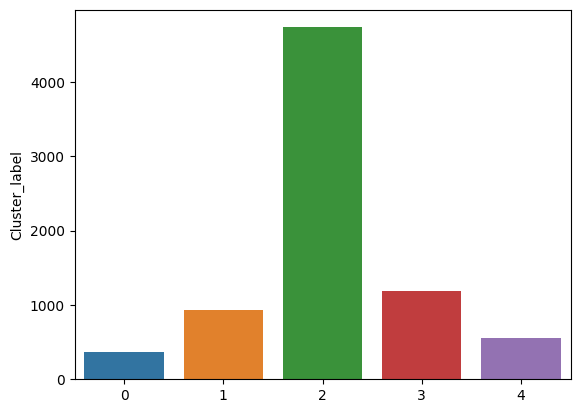

In [ ]:
# Pllotting the frequency of all the clusters by bar plot.

clus = movies_df['Cluster_label'].value_counts()
sns.barplot(x= clus.index,y=clus)

**We can see the count of datapoints in their respective Clusters.**

### **Data Visualization after implementation the clusters.**

In [ ]:
movies_df.head()

show_id  title         director  \
0      s1     3%                    
1      s2   7:19  JorgeMichelGrau   
2      s3  23:59      GilbertChan   
3      s4      9       ShaneAcker   
4      s5     21    RobertLuketic   

                                                cast rating  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...   TVMA   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...   TVMA   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...      R   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...   PG13   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...   PG13   

                                           listed_in  \
0     InternationalTVShows,TVDramas,TVSci-Fi&Fantasy   
1                         Dramas,InternationalMovies   
2                   HorrorMovies,InternationalMovies   
3  Action&Adventure,IndependentMovies,Sci-Fi&Fantasy   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  \
0   JoãoMiguel BiancaComparato MichelGomes Rodolf...   
1  JorgeMichelGrau DemiánBichir HéctorBonilla Osc...   
2  GilbertChan TeddChan StellaChung HenleyHii Law...   
3  ShaneAcker ElijahWood JohnC.Reilly JenniferCon...   
4  RobertLuketic JimSturgess KevinSpacey KateBosw...   

                                            new_tags  Cluster_label  
0   joãomiguel biancacomparato michelgomes rodolf...              2  
1  jorgemichelgrau demiánbichir héctorbonilla osc...              1  
2  gilbertchan teddchan stellachung henleyhii law...              2  
3  shaneacker elijahwood johncreilly jenniferconn...              2  
4  robertluketic jimsturgess kevinspacey katebosw...              2

In [90]:
def Word_Cloud(cluster,column_name):
  
  for i in range(cluster):

    f, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(18, 5), sharex=True) #Instantiating the four axes for four columns

    word_cloud= movies_df[movies_df[column_name] == i].dropna() # Removing the null values
    word_cloud_df = word_cloud[['director','cast','listed_in','description']] # Feature whic has to be showed in the wordcloud

    text = ' '.join([i for i in word_cloud_df['director']]) # Joining all the documnets.
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text) # Generating the texts.
    ax1.imshow(wordcloud) 
    ax1.axis("off")
    ax1.set_title(f'Directors names for cluster {i}')

    # Repeating the process.

    text = ' '.join([i for i in word_cloud_df['cast']])
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)
    ax2.imshow(wordcloud)
    ax2.axis("off")
    ax2.set_title(f'Cast names for cluster {i}')

    text = ' '.join([i for i in word_cloud_df['listed_in']])
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)
    ax3.imshow(wordcloud)
    ax3.axis("off")
    ax3.set_title(f'Genre Cloud for cluster {i}')

    text = ' '.join([i for i in word_cloud_df['description']])
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)
    ax4.imshow(wordcloud)
    ax4.axis("off")
    ax4.set_title(f'Description Cloud for cluster {i}')
    plt.show()

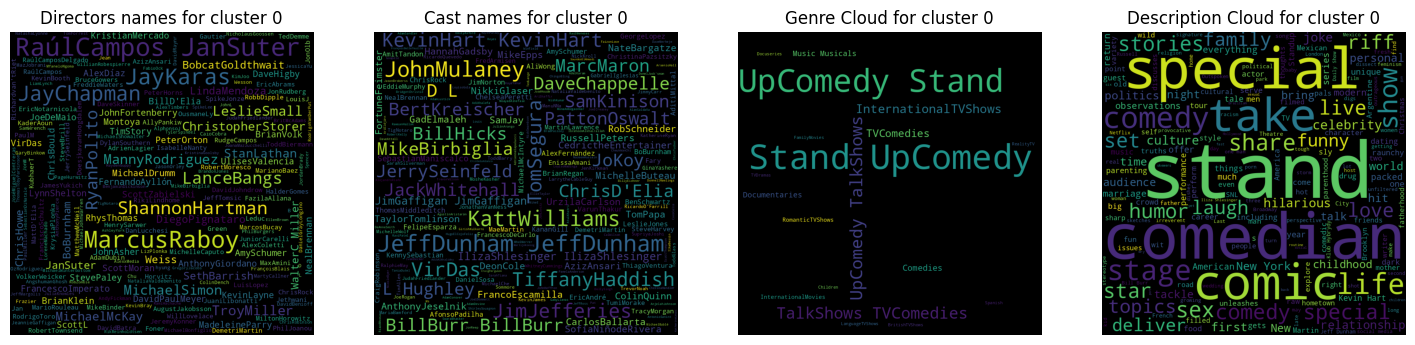

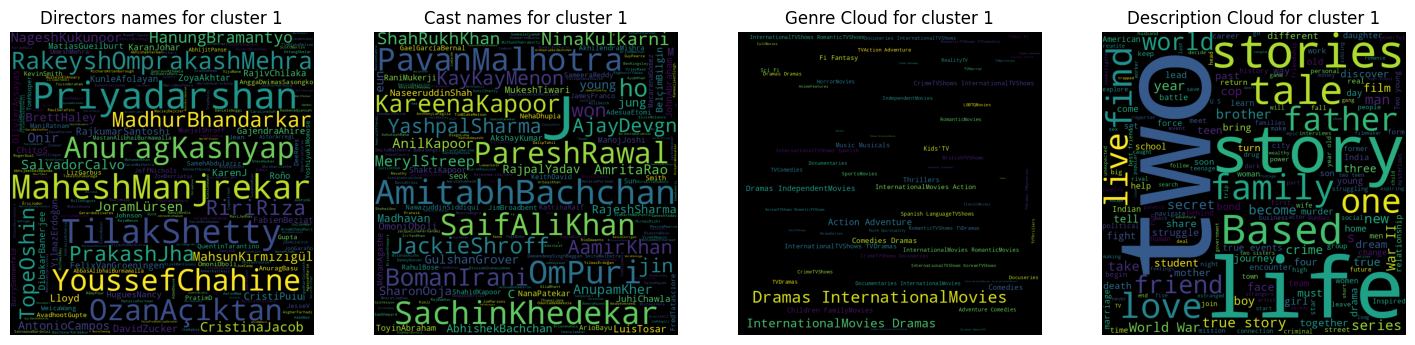

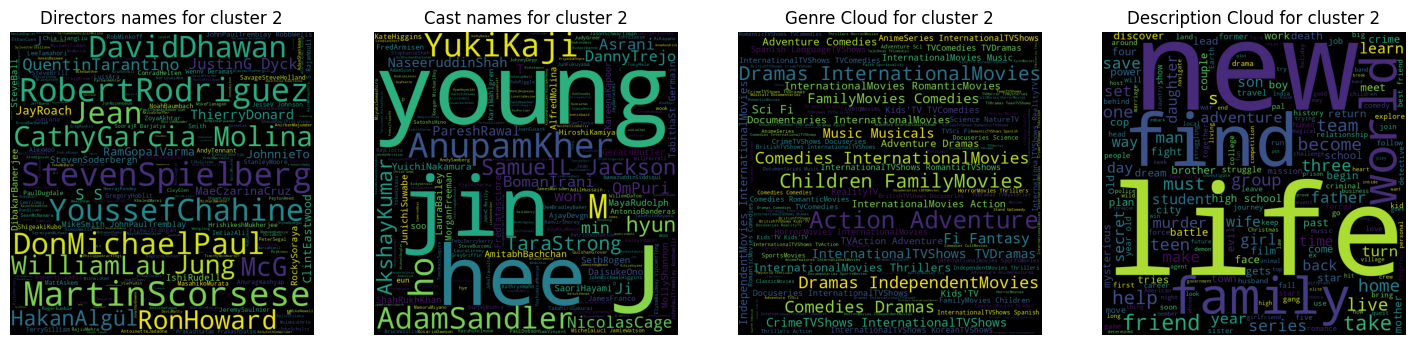

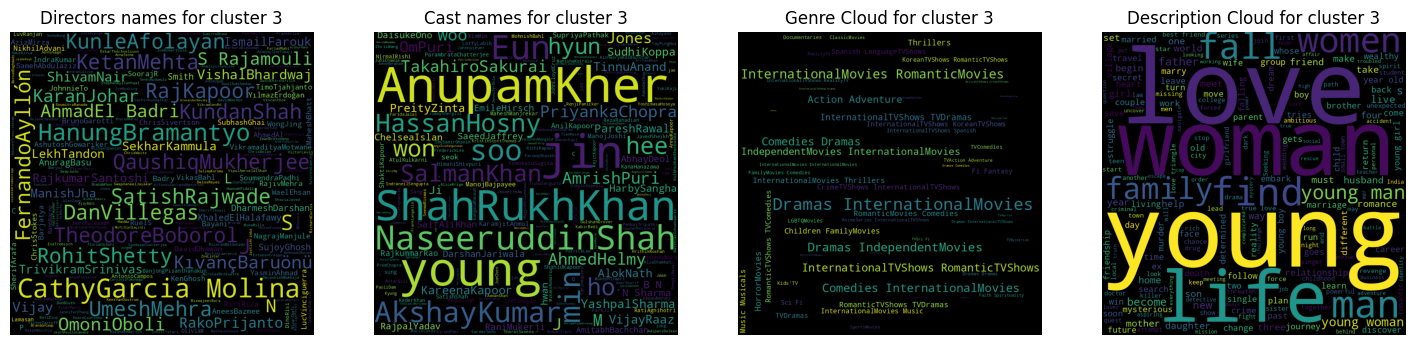

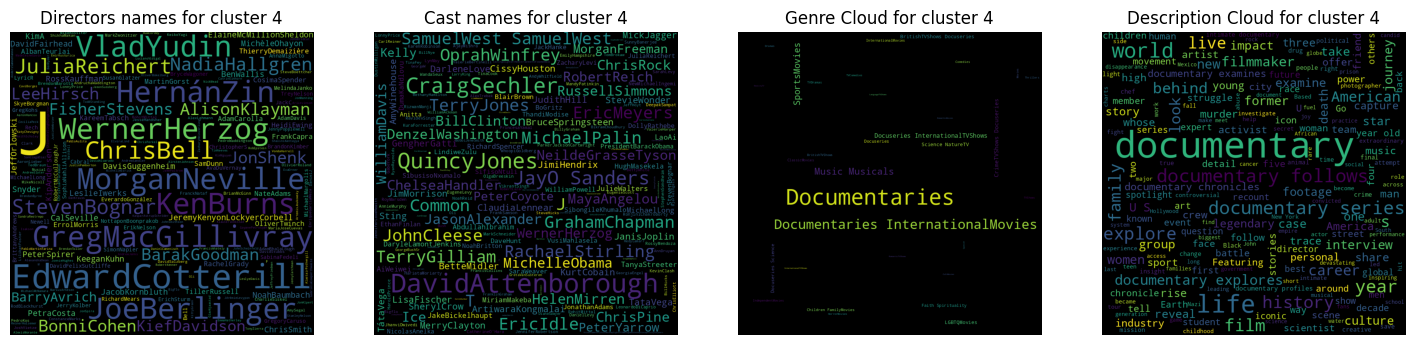

In [ ]:
Word_Cloud(5,'Cluster_label')

**By obsserving the wordcloud , we can see the word which shows maximum frequency, arranged according to the name of director, name of cast, description of movies and genres.**

### ML Model - 2

---


**Heirarchial Clustering**

<function matplotlib.pyplot.show(close=None, block=None)>

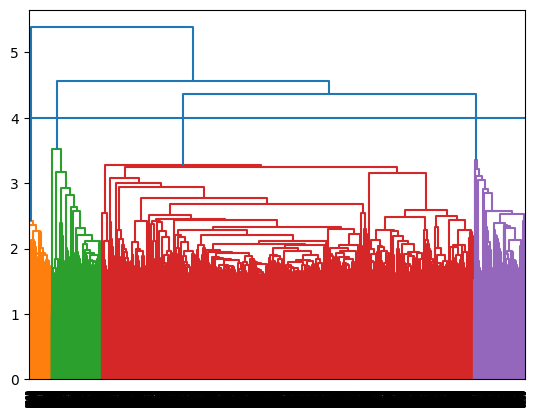

In [ ]:
shc.dendrogram(shc.linkage(ext_features,'ward'))
plt.axhline(y=4)

plt.show

**Dendrogram is working via ward linkage where a complex mathematics run to find the distances between clusters. If we use `ward`, then the algorithm works by finding the euclidean distance between datapoints.**
**By observing the dendrogram we can see , four clusters can be very easil formed. Hence finally we are marching forward with four clusters.**

In [86]:
# ML Model - 2 Implementation
agglo_clustering = AgglomerativeClustering(n_clusters=4)
# Fit the Algorithm
agglo_clustering.fit(ext_features)
# Predict on the model

AgglomerativeClustering(n_clusters=4)

In [87]:
# Assigning the clusters to their datapoints.
movies_df['Agglo_clusters']= agglo_clustering.labels_
movies_df.head()

show_id  title         director  \
0      s1     3%                    
1      s2   7:19  JorgeMichelGrau   
2      s3  23:59      GilbertChan   
3      s4      9       ShaneAcker   
4      s5     21    RobertLuketic   

                                                cast rating  \
0  JoãoMiguel BiancaComparato MichelGomes Rodolfo...   TVMA   
1  DemiánBichir HéctorBonilla OscarSerrano Azalia...   TVMA   
2  TeddChan StellaChung HenleyHii LawrenceKoh Tom...      R   
3  ElijahWood JohnC.Reilly JenniferConnelly Chris...   PG13   
4  JimSturgess KevinSpacey KateBosworth AaronYoo ...   PG13   

                                           listed_in  \
0     InternationalTVShows,TVDramas,TVSci-Fi&Fantasy   
1                         Dramas,InternationalMovies   
2                   HorrorMovies,InternationalMovies   
3  Action&Adventure,IndependentMovies,Sci-Fi&Fantasy   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                tags  \
0   JoãoMiguel BiancaComparato MichelGomes Rodolf...   
1  JorgeMichelGrau DemiánBichir HéctorBonilla Osc...   
2  GilbertChan TeddChan StellaChung HenleyHii Law...   
3  ShaneAcker ElijahWood JohnC.Reilly JenniferCon...   
4  RobertLuketic JimSturgess KevinSpacey KateBosw...   

                                            new_tags  Cluster_label  \
0   joãomiguel biancacomparato michelgomes rodolf...              2   
1  jorgemichelgrau demiánbichir héctorbonilla osc...              1   
2  gilbertchan teddchan stellachung henleyhii law...              2   
3  shaneacker elijahwood johncreilly jenniferconn...              2   
4  robertluketic jimsturgess kevinspacey katebosw...              2   

   Agglo_clusters  
0               1  
1               1  
2               1  
3               1  
4               1

In [88]:
movies_df['Agglo_clusters'].value_counts()

1    6508
0     668
2     319
3     292
Name: Agglo_clusters, dtype: int64

**Visualization for the Texts of Director , Cast of movies , Description of Movies and Genre of Movies after implementing the Agglomerative Clustering.**

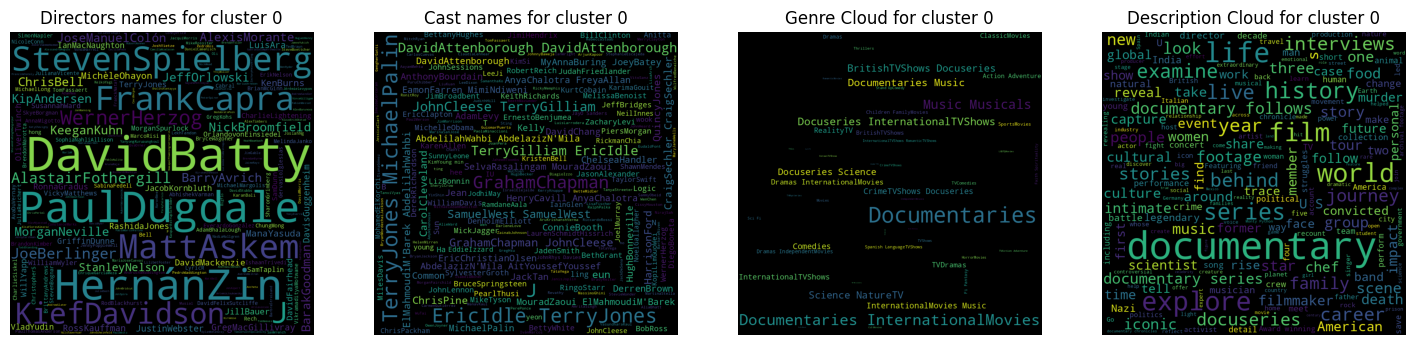

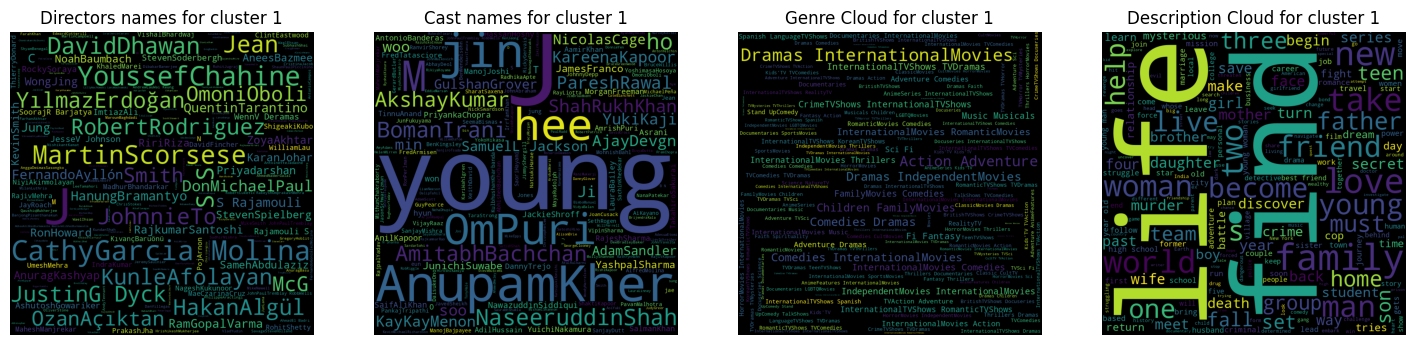

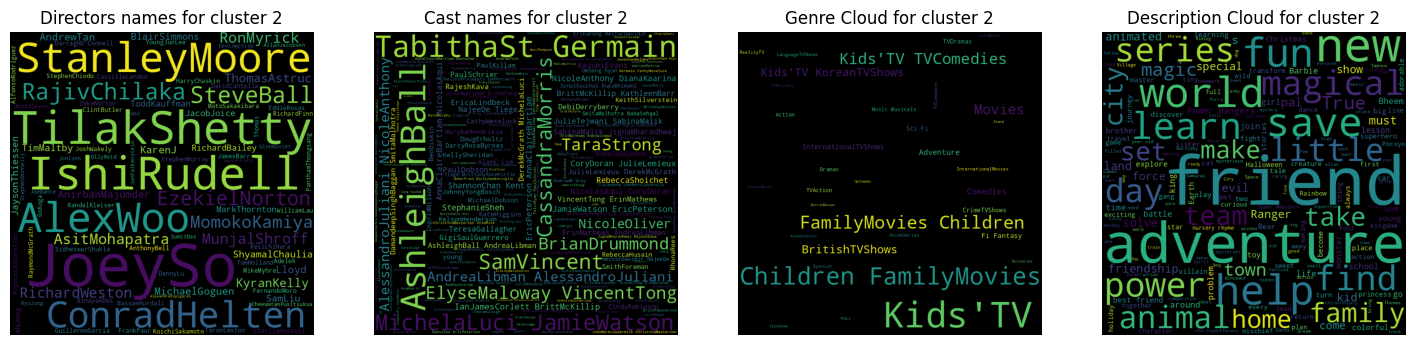

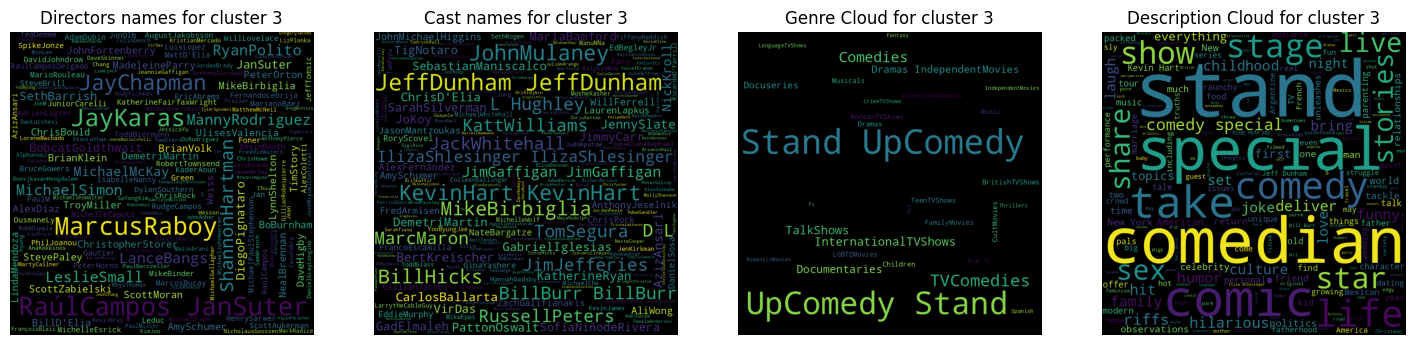

In [91]:
Word_Cloud(4,'Agglo_clusters')

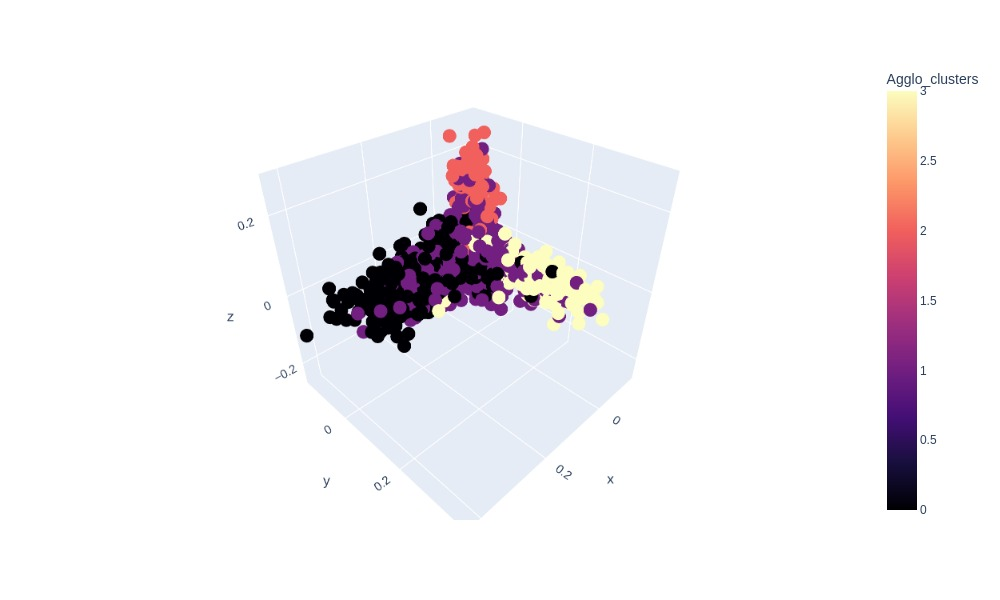

In [92]:
import plotly.express as px

fig = px.scatter_3d(movies_df, x=dimenssion[:,0], y=dimenssion[:,1], z=dimenssion[:,2],color=movies_df['Agglo_clusters'],
             color_continuous_scale='Magma')
fig.update_layout(width=1000,height = 600)
fig.show('jpg')

**So finally after implementing the agglomerative clustering with four cluster we can see, the clusters are not clear and shows overfitting. Contrary k-means with five clusters is more clear model. The boundries are clear and demarcated.**

## **The Content Based Filtering - Netflix Movies Recommendation Engine.**

In [ ]:
ext_features.shape

(7787, 4000)

**Using `Cosine Similarity` we will find out the top 10 closest vectors. They will be considered as recommendations.**

In [ ]:
def recommendation_engine(movie):

  print(f'Your choice is great. Have a look over these movies.')
  print(' ') # This is for gap while printing the results.
  df= movies_df.reset_index()
  movie_index = df[ df['title'] == movie ].index[0]  # Extracting the movie index for sorting out the similarity cosine.

  movie = sorted(list(enumerate(cosine_similarity(ext_features)[movie_index])),reverse=True,key=lambda x: x[1])

  for i in movie[:10]: # Here I am providing the top 10 recommendations.
    print(df['title'][i[0]])

In [ ]:
recommendation_engine('My Little Pony Equestria Girls: Forgotten Friendship' )

Your choice is great. Have a look over these movies.
 
My Little Pony Equestria Girls: Forgotten Friendship
My Little Pony Equestria Girls: Rollercoaster of Friendship
My Little Pony Equestria Girls: Legend of Everfree
My Little Pony Equestria Girls: Friendship Games
Equestria Girls: Tales of Canterlot High
My Little Pony: Friendship Is Magic
My Little Pony Equestria Girls: Rainbow Rocks
My Little Pony Friendship Is Magic: Best Gift Ever
Barbie in A Mermaid Tale
Strawberry Shortcake: Berry Bitty Adventures


In [ ]:
recommendation_engine('Naruto Shippuden : Blood Prison' )

Your choice is great. Have a look over these movies.
 
Naruto Shippuden : Blood Prison
Naruto Shippûden the Movie: Bonds
Naruto Shippuden: The Movie
Naruto
Naruto the Movie 3: Guardians of the Crescent Moon Kingdom
Naruto Shippuden: The Movie: The Lost Tower
Naruto Shippûden the Movie: The Will of Fire
Naruto the Movie 2: Legend of the Stone of Gelel
Naruto the Movie: Ninja Clash in the Land of Snow
Expo


# **Conclusion**

**Finally , after getting the movies clustered by utilizing the director , genre and general information about the content provided by the Netflix, we have built our recommendation engine.**

**We had faced a little problem for finfing the value of `K` in Elbow method and Silhouette method. So we genralise the model and implemented it using five clusters. But, the clusters of k means are more shapr and clear. Their boudries are clearly observed.**

**Contrary, while implementing the agglomrative clustering, number of clusters have been very easily found out with the help of dendrogram.But the boundries of clusters are not as sharp as k-means. They are interlinked and shows the sign of overfitting.**

**Atlast we use cosine similarity to find out the most closest content vectors.Then we have extracted top 10 vectors and pull out their title.**